<a href="https://colab.research.google.com/github/Rieesteves/EXP-3_DS/blob/main/EXP_3_Fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy

In [ ]:
!pip install 'pyit2fls'

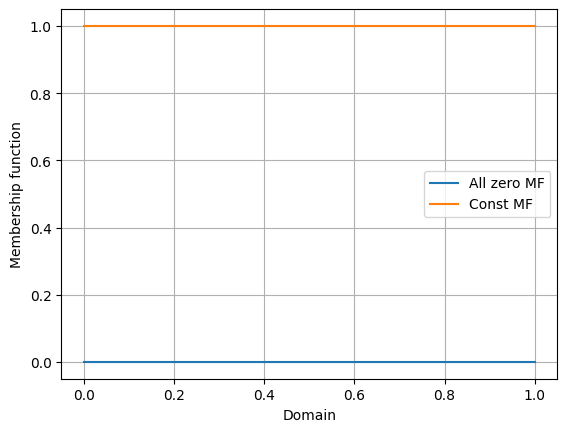

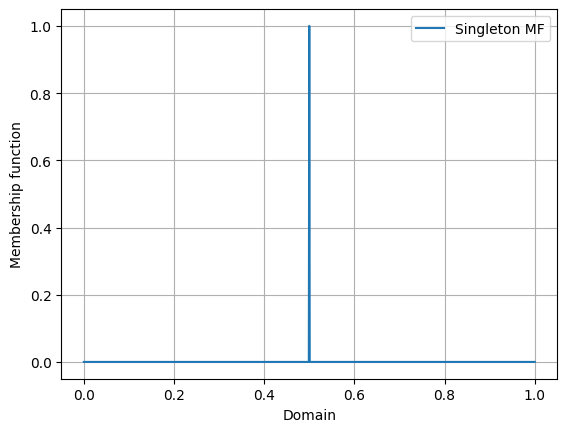

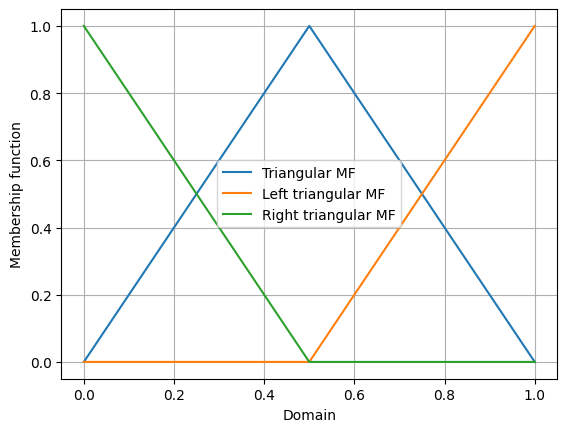

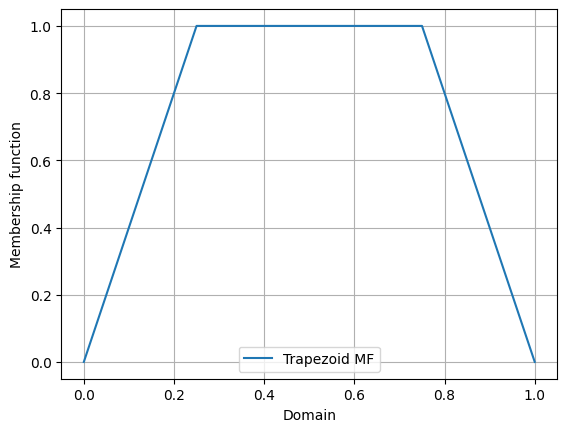

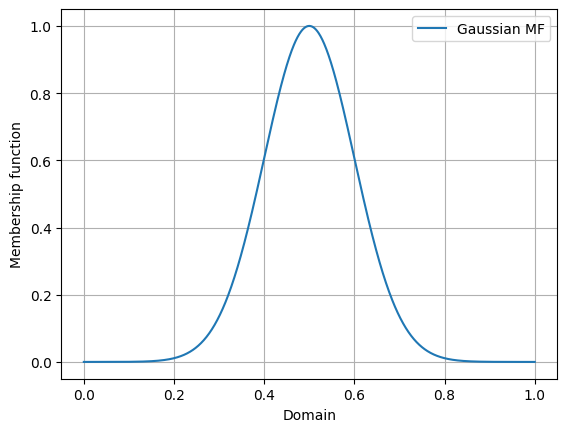

In [ ]:
from numpy import linspace
import matplotlib.pyplot as plt
from pyit2fls import zero_mf, singleton_mf, const_mf, tri_mf, ltri_mf, rtri_mf, \
    trapezoid_mf, gaussian_mf

domain = linspace(0., 1., 1001)

zero = zero_mf(domain)
singleton = singleton_mf(domain, [0.5, 1.])
const = const_mf(domain, [1.])
tri = tri_mf(domain, [0., 0.5, 1., 1.])
ltri = ltri_mf(domain, [0.5, 1., 1.])
rtri = rtri_mf(domain, [0.5, 0., 1.])
trapezoid = trapezoid_mf(domain, [0., 0.25, 0.75, 1., 1.])
gaussian = gaussian_mf(domain, [0.5, 0.1, 1.])

plt.figure()
plt.plot(domain, zero, label="All zero MF")
plt.plot(domain, const, label="Const MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

plt.figure()
plt.plot(domain, singleton, label="Singleton MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

plt.figure()
plt.plot(domain, tri, label="Triangular MF")
plt.plot(domain, ltri, label="Left triangular MF")
plt.plot(domain, rtri, label="Right triangular MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

plt.figure()
plt.plot(domain, trapezoid, label="Trapezoid MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

plt.figure()
plt.plot(domain, gaussian, label="Gaussian MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

In [ ]:
#Importing necessary libraries - for array operations and calculations.
import numpy as np

# Several special methods (e.g., __or__, __and__, __invert__, __sub__, __mul__, __mod__)
# are defined for overloaded operators to perform fuzzy set operations such as union,
# intersection, inversion, subtraction, multiplication, and Cartesian product.


class FuzzySet:
    def __init__(self, iterable: any):
        self.f_set = set(iterable)
        self.f_list = list(iterable)
        self.f_len = len(iterable)
        for elem in self.f_set:
            if not isinstance(elem, tuple):
                raise TypeError("No tuples in the fuzzy set")
            if not isinstance(elem[1], float):
                raise ValueError("Probabilities not assigned to elements")

    def __or__(self, other):
        # fuzzy set union
        if len(self.f_set) != len(other.f_set):
            raise ValueError("Length of the sets is different")
        f_set = [x for x in self.f_set]
        other = [x for x in other.f_set]
        return FuzzySet([f_set[i] if f_set[i][1] > other[i][1] else other[i] for i in range(len(self))])

    def __and__(self, other):
        # fuzzy set intersection
        if len(self.f_set) != len(other.f_set):
            raise ValueError("Length of the sets is different")
        f_set = [x for x in self.f_set]
        other = [x for x in other.f_set]

        return FuzzySet([f_set[i] if f_set[i][1] < other[i][1] else other[i] for i in range(len(self))])

    def __invert__(self):
        f_set = [x for x in self.f_set]
        for indx, elem in enumerate(f_set):
            f_set[indx] = (elem[0], float(round(1 - elem[1], 2)))
        return FuzzySet(f_set)

    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError("Length of the sets is different")
        return self & ~other

    def __mul__(self, other):
        if len(self) != len(other):
            raise ValueError("Length of the sets is different")
        return FuzzySet([(self[i][0], self[i][1] * other[i][1]) for i in range(len(self))])

    def __mod__(self, other):
        # cartesian product
        print(f'The size of the relation will be: {len(self)}x{len(other)} ')
        mx = self
        mi = other
        tmp = [[] for i in range(len(mx))]
        i = 0
        for x in mx:
            for y in mi:
                tmp[i].append(min(x[1], y[1]))
            i += 1
        return np.array(tmp)

#     max_min static method:
# This method calculates the max-min composition of two arrays using nested loops to
#find the maximum of the minimum values of corresponding elements.

    @staticmethod
    def max_min(array1: np.ndarray, array2: np.ndarray):
        tmp = np.zeros((array1.shape[0], array2.shape[1]))
        t = list()
        for i in range(len(array1)):
            for j in range(len(array2[0])):
                for k in range(len(array2)):
                    t.append(round(min(array1[i][k], array2[k][j]), 2))
                tmp[i][j] = max(t)
                t.clear()
        return tmp

# __len__: Calculates the length of the fuzzy set (the number of elements).
# __str__: Returns a string representation of the fuzzy set.
# __getitem__: Allows indexing into the fuzzy set.
# __iter__: Allows iterating through the elements of the fuzzy set.


    def __len__(self):
        self.f_len = sum([1 for i in self.f_set])
        return self.f_len

    def __str__(self):
        return f'{[x for x in self.f_set]}'

    def __getitem__(self, item):
        return self.f_list[item]

    def __iter__(self):
        for i in range(len(self)):
            yield self[i]


a = FuzzySet({('x1', 0.5), ('x2', 0.7), ('x3', 0.0)})
b = FuzzySet({('x1', 0.8), ('x2', 0.2), ('x3', 1.0)})
c = FuzzySet({('x', 0.3), ('y', 0.3), ('z', 0.5)})
x = FuzzySet({('a', 0.5), ('b', 0.3), ('c', 0.7)})
y = FuzzySet({('a', 0.6), ('b', 0.4)})
print(f'a -> {a}')
print(f'b -> {b}')
print(f'Fuzzy union: \n{a | b}')
print(f'Fuzzy intersection: \n{a & b}')
print(f'Fuzzy inversion of b: \n{~b}')
print(f"Fuzzy inversion of a: \n {~a}")
print(f'Fuzzy Subtraction: \n{a - b}')

r = np.array([[0.6, 0.6, 0.8, 0.9], [0.1, 0.2, 0.9, 0.8], [0.9, 0.3, 0.4, 0.8], [0.9, 0.8, 0.1, 0.2]])
s = np.array([[0.1, 0.2, 0.7, 0.9], [1.0, 1.0, 0.4, 0.6], [0.0, 0.0, 0.5, 0.9], [0.9, 1.0, 0.8, 0.2]])
print(f"Max Min: of \n{r} \nand \n{s}\n:\n\n")

print(FuzzySet.max_min(r, s))



a -> [('x1', 0.5), ('x2', 0.7), ('x3', 0.0)]
b -> [('x1', 0.8), ('x2', 0.2), ('x3', 1.0)]
Fuzzy union: 
[('x1', 0.8), ('x2', 0.7), ('x3', 1.0)]
Fuzzy intersection: 
[('x1', 0.5), ('x2', 0.2), ('x3', 0.0)]
Fuzzy inversion of b: 
[('x2', 0.8), ('x3', 0.0), ('x1', 0.2)]
Fuzzy inversion of a: 
 [('x1', 0.5), ('x2', 0.3), ('x3', 1.0)]
Fuzzy Subtraction: 
[('x1', 0.5), ('x3', 0.0)]
Max Min: of 
[[0.6 0.6 0.8 0.9]
 [0.1 0.2 0.9 0.8]
 [0.9 0.3 0.4 0.8]
 [0.9 0.8 0.1 0.2]] 
and 
[[0.1 0.2 0.7 0.9]
 [1.  1.  0.4 0.6]
 [0.  0.  0.5 0.9]
 [0.9 1.  0.8 0.2]]
:


[[0.9 0.9 0.8 0.8]
 [0.8 0.8 0.8 0.9]
 [0.8 0.8 0.8 0.9]
 [0.8 0.8 0.7 0.9]]


In [ ]:
!pip install -U scikit-fuzzy

Washing Time: 24.731707317073198


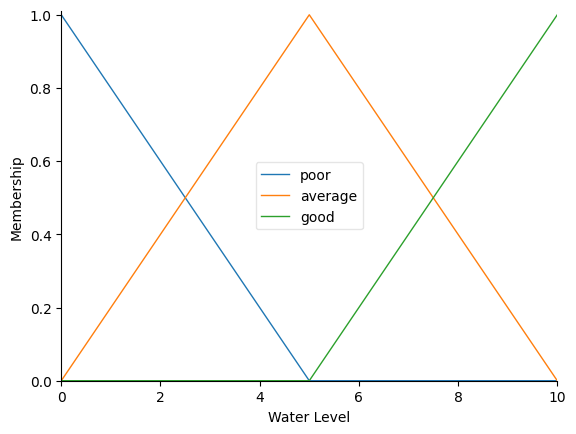

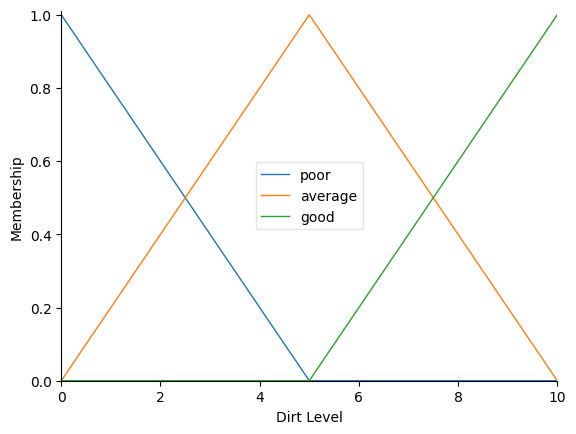

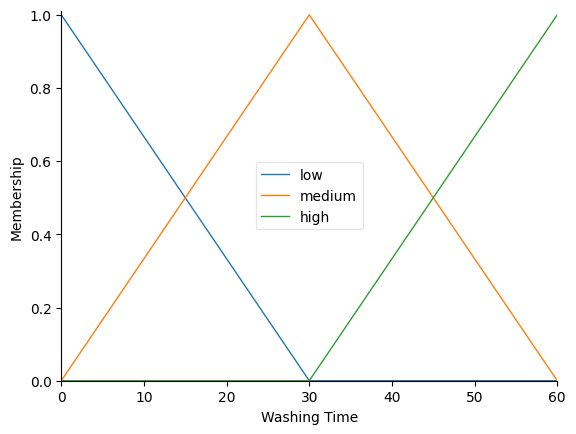

In [ ]:
# Import necessary libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Create fuzzy input variables
water_level = ctrl.Antecedent(np.arange(0, 11, 1), 'Water Level')
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'Dirt Level')

# Create fuzzy output variable
washing_time = ctrl.Consequent(np.arange(0, 61, 1), 'Washing Time')

# Define custom membership functions for input variables
water_level.automf(3)  # Create 'poor,' 'average,' and 'good' membership functions
dirt_level.automf(3)   # Create 'poor,' 'average,' and 'good' membership functions

# Define custom membership functions for the output variable
washing_time['low'] = fuzz.trimf(washing_time.universe, [0, 0, 30])
washing_time['medium'] = fuzz.trimf(washing_time.universe, [0, 30, 60])
washing_time['high'] = fuzz.trimf(washing_time.universe, [30, 60, 60])

# Define the fuzzy rules
rule1 = ctrl.Rule(water_level['poor'] & dirt_level['poor'], washing_time['low'])
rule2 = ctrl.Rule(water_level['average'] & dirt_level['average'], washing_time['medium'])
rule3 = ctrl.Rule(water_level['good'] & dirt_level['good'], washing_time['high'])

# Create the control system
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create a simulation
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)

# Input values
washing_sim.input['Water Level'] = 2
washing_sim.input['Dirt Level'] = 2

# Perform fuzzy inference
washing_sim.compute()

# View the result
print("Washing Time:", washing_sim.output['Washing Time'])

# Visualize the membership functions and the output
water_level.view()
dirt_level.view()
washing_time.view()
plt.show()
